# Laboratorio 2 - Práctica 3: MLP con Keras -  Predicción de contratación de producto bancario
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Función previas](#id1)
1. [Apartado 1](#id2)


---

### Importar Librerias

---

In [1]:
#Importacion de Librerias
import numpy as np
import pandas as pd
import sklearn
import tensorflow as ts
import keras
import matplotlib.pyplot as plt
from keras.callbacks import LambdaCallback
from sklearn.model_selection import train_test_split
import pprint
import os
import imageio
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ProgbarLogger
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns



<div id='id0'/>

## *Introducción*
---
Utiliza   lo   practicado   en   este   laboratorio   para   resolver   un   caso   práctico   “real”   usando   la   librería   Keras/TensorFlow2 y  una  arquitectura  MLP  para  predecir  si  una  persona  se  va  a  subscribir  o  no  a  un  producto   bancario   (depósito).   

---

<div id='id1'/>

## Funciones previas al apartado 1

---

### Creacion de las carpetas

In [2]:
if(os.path.exists("Modelos")) == 0:
    os.mkdir("Modelos")

### Lectura del CSV

In [3]:
data = pd.read_csv("bank-dataset.csv", sep = ";")
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Preprocesamiento

In [4]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
    data[var] = pd.Categorical(data[var])
    data[var] = data[var].cat.codes
data['y'] = pd.Categorical(data['y']).codes
data['y'] = to_categorical(data['y'], num_classes=2)


### Normalización

In [5]:
scaler = StandardScaler()
num_vars = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
data[num_vars] = scaler.fit_transform(data[num_vars])

<div id='id2'/>

## *Apartado 1*
---

### Implementación de la Red


Neuronas en capa oculta: 2 Epocas: 25
-------------------------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 42        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________
Epoch 0: loss=0.10408329218626022, accuracy=0.8859484195709229
258/258 [==============================] - 0s 1ms/step
Confusion matrix:
[[ 434  543]
 [ 234 7027]]
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0599 - accuracy: 0.9135

Neuronas en capa oculta: 2 Epocas: 50
-------------------------------------------------
Model: "sequential_1"
__

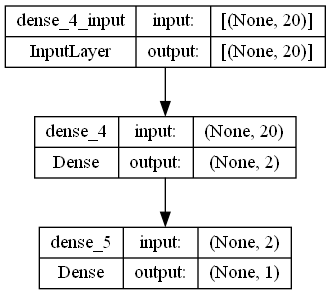


Neuronas en capa oculta: 4 Epocas: 25
-------------------------------------------------
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 84        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
Epoch 0: loss=0.09364546835422516, accuracy=0.8813049793243408
258/258 [==============================] - 0s 806us/step
Confusion matrix:
[[ 490  487]
 [ 274 6987]]
1030/1030 [==============================] - 1s 920us/step - loss: 0.0604 - accuracy: 0.9147

Neuronas en capa oculta: 4 Epocas: 50
-------------------------------------------------
Model: "sequential

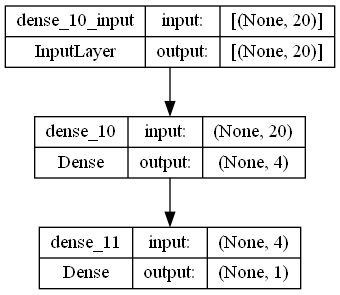


Neuronas en capa oculta: 8 Epocas: 25
-------------------------------------------------
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 168       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
Epoch 0: loss=0.10419423133134842, accuracy=0.864643394947052
258/258 [==============================] - 0s 921us/step
Confusion matrix:
[[ 507  470]
 [ 283 6978]]
1030/1030 [==============================] - 1s 926us/step - loss: 0.0590 - accuracy: 0.9155

Neuronas en capa oculta: 8 Epocas: 50
-------------------------------------------------
Model: "sequentia

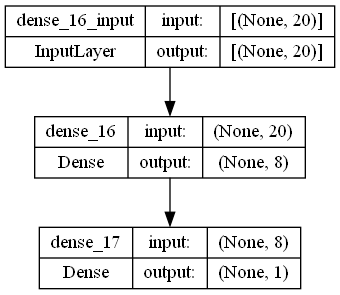

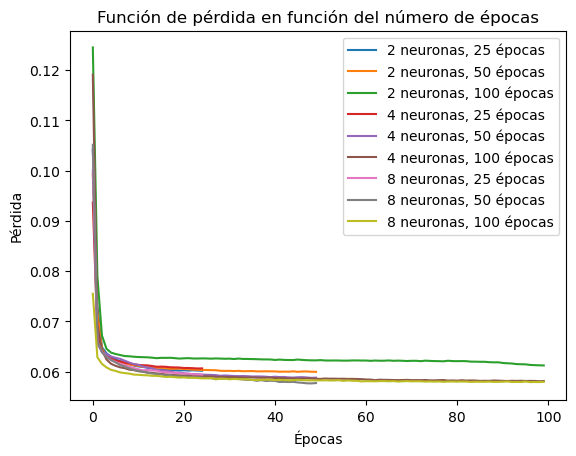

In [6]:
# Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis=1), data['y'], test_size=0.2)

# Lista de neuronas en la capa oculta
neurons = [2, 4, 8]

# Lista de valores de época
epochs = [25, 50, 100]

def print_progress(epoch, logs):
    if epoch % 50 == 0:
        print('Epoch {}: loss={}, accuracy={}'.format(epoch, logs['loss'], logs['accuracy']))
cont = 0
# Bucle para entrenar diferentes modelos
for n in neurons:
  for e in epochs:
      # Crear modelo
        model = Sequential()
        model.add(Dense(n, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        # Entrenar modelo 
        print("\nNeuronas en capa oculta:", n, "Epocas:", e)
        print("-------------------------------------------------")
        model.summary()
        history = model.fit(X_train, y_train, epochs=e, batch_size=32, validation_data=(X_test, y_test),verbose=0, callbacks=[LambdaCallback(on_epoch_end=print_progress)])

        # Predecir valores
        y_pred = model.predict(X_train)
        y_pred = (model.predict(X_test) > 0.5).astype("int32")

        # Obtener la matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        print('Confusion matrix:')
        print(cm)
        
        scores = model.evaluate(X_train, y_train)
                
        # Graficar función de pérdida
        plt.plot(history.history['loss'], label=f'{n} neuronas, {e} épocas')
  #Guardar Imagen del modelo
  
  plot_model(model, to_file=f'Modelos/modelo_{cont}.png', show_shapes=True)
  
  # Mostrar el modelo
  display(Image(f'Modelos/modelo_{cont}.png'))
  cont += 1
 
# Configurar gráfico
plt.title('Función de pérdida en función del número de épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

<div id='id3'/>

## *Quitamos datos*
---

In [7]:
data_MenosDatos = pd.read_csv("bank-dataset.csv", sep = ";")
data_MenosDatos = data.drop(['day_of_week', 'month' , 'default', 'pdays'], axis=1)
data_MenosDatos.head(10)

,age,job,marital,education,housing,loan,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,3,1,0,0,0,1,0.010471,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,1.0
1,1.628993,7,1,3,0,0,1,-0.421501,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,1.0
2,-0.290186,7,1,3,2,0,1,-0.124520,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,1.0
3,-0.002309,0,1,1,0,0,1,-0.413787,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,1.0
4,1.533034,7,1,3,0,2,1,0.187888,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,1.0
5,0.477486,7,1,2,0,0,1,-0.232513,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,1.0
6,1.820911,0,1,5,0,0,1,-0.460069,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,1.0
7,0.093650,1,1,7,0,0,1,-0.159232,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,1.0
8,-1.537652,9,2,5,2,0,1,0.469442,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,1.0
9,-1.441693,7,2,3,2,0,1,-0.803333,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,1.0


In [8]:
cat_vars = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']
for var in cat_vars:
    data_MenosDatos[var] = pd.Categorical(data[var])
    data_MenosDatos[var] = data_MenosDatos[var].cat.codes
data_MenosDatos['y'] = pd.Categorical(data['y']).codes
data_MenosDatos['y'] = to_categorical(data['y'], num_classes=2)


In [9]:
scaler = StandardScaler()
num_vars = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
data[num_vars] = scaler.fit_transform(data_MenosDatos[num_vars])


Neuronas en capa oculta: 2 Epocas: 25
-------------------------------------------------
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 2)                 42        
                                                                 
 dense_19 (Dense)            (None, 1)                 3         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________
Epoch 0: loss=0.18040814995765686, accuracy=0.8847041130065918
258/258 [==============================] - 0s 755us/step
Confusion matrix:
[[7102  216]
 [ 491  429]]
1030/1030 [==============================] - 1s 896us/step - loss: 0.0631 - accuracy: 0.9118

Neuronas en capa oculta: 2 Epocas: 50
-------------------------------------------------
Model: "sequential

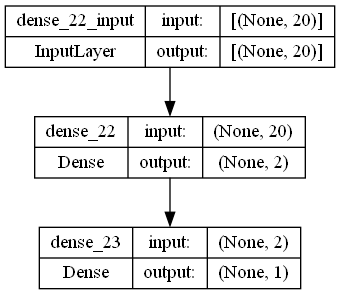


Neuronas en capa oculta: 4 Epocas: 25
-------------------------------------------------
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 4)                 84        
                                                                 
 dense_25 (Dense)            (None, 1)                 5         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
Epoch 0: loss=0.10785030573606491, accuracy=0.8584825396537781
258/258 [==============================] - 0s 766us/step
Confusion matrix:
[[7042  276]
 [ 464  456]]
1030/1030 [==============================] - 1s 951us/step - loss: 0.0616 - accuracy: 0.9124

Neuronas en capa oculta: 4 Epocas: 50
-------------------------------------------------
Model: "sequentia

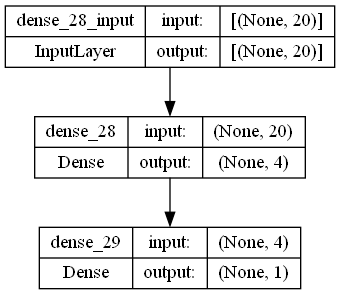


Neuronas en capa oculta: 8 Epocas: 25
-------------------------------------------------
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 8)                 168       
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
Epoch 0: loss=0.09206879884004593, accuracy=0.8799089789390564
258/258 [==============================] - 0s 715us/step
Confusion matrix:
[[7102  216]
 [ 505  415]]
1030/1030 [==============================] - 1s 984us/step - loss: 0.0598 - accuracy: 0.9125

Neuronas en capa oculta: 8 Epocas: 50
-------------------------------------------------
Model: "sequent

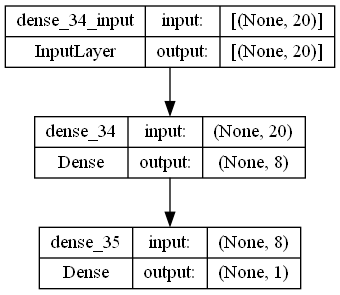

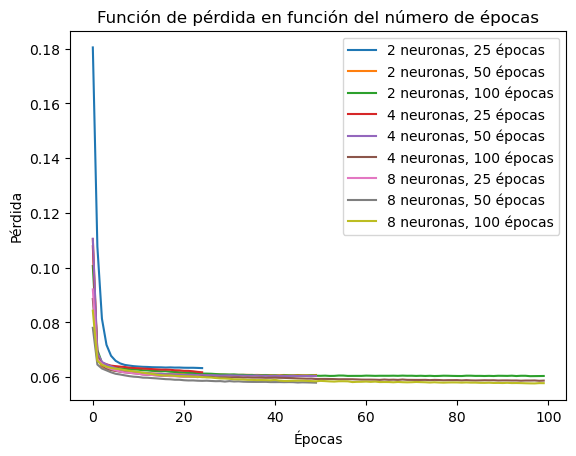

In [10]:
# Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis=1), data_MenosDatos['y'], test_size=0.2)

# Lista de neuronas en la capa oculta
neurons = [2, 4, 8]

# Lista de valores de época
epochs = [25, 50, 100]

def print_progress(epoch, logs):
    if epoch % 50 == 0:
        print('Epoch {}: loss={}, accuracy={}'.format(epoch, logs['loss'], logs['accuracy']))
cont = 0
# Bucle para entrenar diferentes modelos
for n in neurons:
  for e in epochs:
      # Crear modelo
        model = Sequential()
        model.add(Dense(n, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        # Entrenar modelo 
        print("\nNeuronas en capa oculta:", n, "Epocas:", e)
        print("-------------------------------------------------")
        model.summary()
        history = model.fit(X_train, y_train, epochs=e, batch_size=32, validation_data=(X_test, y_test),verbose=0, callbacks=[LambdaCallback(on_epoch_end=print_progress)])

        # Predecir valores
        y_pred = model.predict(X_train)
        y_pred = (model.predict(X_test) > 0.5).astype("int32")

        # Obtener la matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        print('Confusion matrix:')
        print(cm)
        
        scores = model.evaluate(X_train, y_train)
                
        # Graficar función de pérdida
        plt.plot(history.history['loss'], label=f'{n} neuronas, {e} épocas')
  #Guardar Imagen del modelo
  plot_model(model, to_file=f'Modelos/modelo_{cont}.png', show_shapes=True)
  # Mostrar el modelo
  display(Image(f'Modelos/modelo_{cont}.png'))
  cont += 1
 
# Configurar gráfico
plt.title('Función de pérdida en función del número de épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

<div id='id3'/>

## *Apartado 2*
---

### Analisis de datos

#### Análisis PCA

In [11]:
# Definir columnas numéricas y categóricas
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
# Transformador para escalar columnas numéricas
num_transformer = StandardScaler()

# Transformador para codificar columnas categóricas
cat_transformer = OneHotEncoder()

# Combinar los transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_vars)])

# Aplicar preprocesamiento
X = preprocessor.fit_transform(data.drop('y', axis=1))
y = data['y']

# Crear modelo PCA con 2 componentes principales
pca = PCA(n_components = 18)

# Ajustar modelo PCA a los datos
X_pca = pca.fit_transform(X)

# Crear DataFrame con datos de PCA
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15', 'PCA16', 'PCA17', 'PCA18'])

# Añadir variable objetivo
pca_df['y'] = y.values

components = pca.components_

# Imprimir los autovectores
for i, component in enumerate(components):
    print(f"Componente {i+1}:")
    for j, attribute in enumerate(cat_vars):
        print(f"{attribute}: {component[j]}")
    print()

print(pca.explained_variance_ratio_)
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_) 
print("Porcentaje total de varianza explicada:",sum(pca.explained_variance_ratio_))

Componente 1:
job: -0.003335394287874105
marital: 0.0242519036798656
education: -0.09678615483923463
default: -0.2192509507415663
housing: 0.3019840993714876
loan: -0.47199784502559317
contact: -0.36296360698690505
month: -0.10347786188268682
day_of_week: -0.4742185419520216
poutcome: -0.4516404059491489

Componente 2:
job: 0.2756288750536868
marital: 0.06017083436667969
education: -0.004681162786497661
default: -0.5978286405261612
housing: 0.46282346713951933
loan: 0.14367926311929125
contact: 0.2738394418807311
month: 0.41944384303098925
day_of_week: 0.13023295333590584
poutcome: -0.02882438104723749

Componente 3:
job: -0.6902724413097878
marital: 0.058841789090774754
education: 0.15280427461231622
default: -0.25149237639160427
housing: 0.2676372008811087
loan: 0.10351255422353073
contact: 0.2885082759065474
month: -0.4097753479486746
day_of_week: 0.027724710876004272
poutcome: 0.032971391390917655

Componente 4:
job: -0.15987463021932877
marital: 0.7308909950361375
education: -0.64

#### Arbol de decision

In [12]:
# Cargar datos
data = pd.read_csv("bank-dataset.csv", sep = ";")

# Separar variables predictoras y variable objetivo
X = data.drop(['y'], axis=1)
y = data['y']

# Convertir variables categóricas en numéricas utilizando one-hot encoding
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
X_encoded = ohe.fit_transform(X[cat_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names(cat_cols))
X_encoded_df.index = X.index
X_numerical = pd.concat([X.drop(cat_cols, axis=1), X_encoded_df], axis=1)

# Crear modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar modelo
rf.fit(X_numerical, y)

# Obtener importancia de características
feature_importances = rf.feature_importances_

# Crear dataframe con importancia de características
fi_df = pd.DataFrame({'feature': X_numerical.columns, 'importance': feature_importances})

# Ordenar características por importancia descendente
fi_df = fi_df.sort_values(by='importance', ascending=False)

# Imprimir características y su importancia
print(fi_df)

# Establecer la opción para mostrar todos los elementos
pd.set_option('display.max_rows', None)

# Mostrar todos los elementos del DataFrame
print(fi_df)

c:\Users\julia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


                 feature    importance
1               duration  2.829141e-01
8              euribor3m  9.743296e-02
0                    age  8.105159e-02
9            nr.employed  4.806773e-02
2               campaign  4.004361e-02
..                   ...           ...
21           job_unknown  1.668184e-03
47             month_dec  8.287767e-04
25       marital_unknown  4.911303e-04
30  education_illiterate  2.016763e-04
36           default_yes  8.201291e-09

[63 rows x 2 columns]
                          feature    importance
1                        duration  2.829141e-01
8                       euribor3m  9.743296e-02
0                             age  8.105159e-02
9                     nr.employed  4.806773e-02
2                        campaign  4.004361e-02
3                           pdays  3.051449e-02
5                    emp.var.rate  2.502139e-02
7                   cons.conf.idx  2.329870e-02
6                  cons.price.idx  2.257853e-02
62               poutcome_suc